# 使用 KMeans 與 SVC 分類手寫辨識

## 讀入資料

In [1]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits)

{'data': array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ..

## 探索資料

In [3]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [4]:
print(digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [5]:
print(digits.target)

[0 1 2 ..., 8 9 8]


In [6]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [41]:
import numpy as np
print("data shape: ", digits.data.shape)
print("target shape: ", digits.target.shape)
print("images shape: ", digits.images.shape)

data shape:  (1797, 64)
target shape:  (1797,)
images shape:  (1797, 8, 8)


In [11]:
np.all(digits.images.reshape((1797, 64)) == digits.data)

True

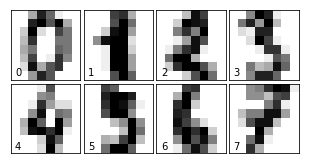

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4, 2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    ax.text(0, 7, str(digits.target[i]))
plt.show()

In [17]:
from sklearn.decomposition import RandomizedPCA, PCA
randomized_pca = RandomizedPCA(n_components=2)
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(digits.data)

print("Shape of reduced_data_rpca: ", reduced_data_rpca.shape)
print("---")

print("RPCA:")
print(reduced_data_rpca)
print("PCA:")
print(reduced_data_pca)

Shape of reduced_data_rpca:  (1797, 2)
---
RPCA:
[[ -1.24820741  21.28165813]
 [  7.93852108 -20.76758564]
 [  6.98430276  -9.95757702]
 ..., 
 [ 10.84236627  -7.00910783]
 [ -4.85806447  12.41902188]
 [ -0.28907592   6.31187473]]
PCA:
[[ -1.25946734  21.2748832 ]
 [  7.95760991 -20.76869938]
 [  6.99192477  -9.95598621]
 ..., 
 [ 10.80128391  -6.96025228]
 [ -4.87209276  12.42395414]
 [ -0.34438782   6.36554976]]


/Users/william/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


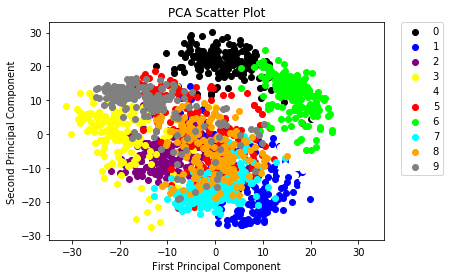

In [18]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

## 資料預處理

In [19]:
from sklearn.preprocessing import scale

data = scale(digits.data)

In [21]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test, image_train, image_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

In [22]:
print("X_train shape: ", X_train.shape)
print(len(y_train))

X_train shape:  (1347, 64)
1347


## 使用 KMeans

#### init: 指定演算法
#### n_clusters: 群的數目

In [23]:
from sklearn import cluster

clf = cluster.KMeans(init="k-means++", n_clusters=10, random_state=42)
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

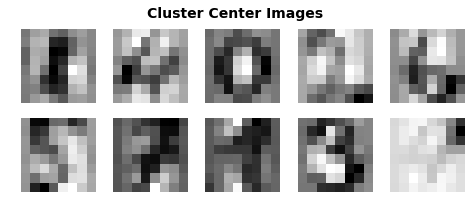

In [24]:
fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    plt.axis('off')

plt.show()

In [25]:
y_pred = clf.predict(X_test)
print(y_pred[:100])
print(y_test[:100])
print(clf.cluster_centers_.shape)

[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]
(10, 64)


#### 用 Isomap 降維並比較預測與答案

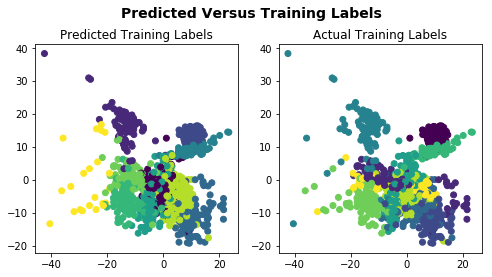

In [27]:
from sklearn.manifold import Isomap

# 這次我們改用 Isomap() 來對 digits 資料進行降維，跟主成份分析不同的地方是 Isomap 屬於非線性的降維方法。
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散佈圖 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

#### 用 PCA 降維並比較預測與答案

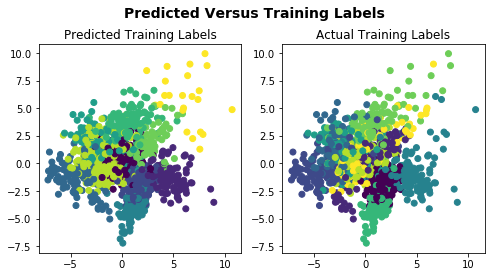

In [28]:
X_pca = PCA(n_components=2).fit_transform(X_train)

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散佈圖 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

#### 混淆矩陣：41 個 5 被正確預測，11 個 8 被正確預測

In [29]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


#### 混淆矩陣並不是唯一的評估方式，還有非常多的評估指標可以參考，包含
#### 1. Homogeneity score
#### 2. Completeness score
#### 3. V-measure score
#### 4. Adjusted rand score
#### 5. Adjusted Mutual Info score, AMI score
#### 6. Silhouette score
#### 但這些評估指標都不是太好，像是 silhouette score 接近 0，代表很多的觀測值都接近分群邊界而可能被分到錯誤的群集中；
#### 而 ARI 則告訴我們同一群集中的觀測值沒有完全相同；
#### Completeness score 則告訴我們一定有觀測值被分在錯誤的群集。

In [30]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(X_test, y_pred, metric='euclidean')))

inertia    homo   compl  v-meas     ARI AMI  silhouette
54276   0.688   0.733   0.710   0.567   0.674    0.146


## 使用 SVC

#### 手動設置 gamma

In [31]:
from sklearn import svm

svc_model = svm.SVC(gamma=0.001, C=100., kernel="linear")
svc_model.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 透過網格搜索（Grid search）或交叉驗證（Cross validation）都可以自動找出合適的參數設定

In [32]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=0)

# Import GridSearchCV
from sklearn.grid_search import GridSearchCV

# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(X_train, y_train)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

/Users/william/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best score for training data: 0.9844097995545658
Best `C`: 10
Best kernel: rbf
Best `gamma`: 0.001


In [34]:
# Apply the classifier to the test data, and view the accuracy score
print(clf.score(X_test, y_test))

# Train and score a new classifier with the grid search parameters
print(svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test))

0.991101223582
0.991101223582


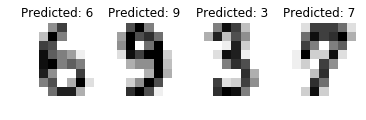

In [38]:
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

# 將預測結果指派給 `predicted`
predicted = svc_model.predict(X_test)

# 將 `images_test` 與 `predicted` 存入 `images_and_predictions`
images_and_predictions = list(zip(images_test, predicted))

# 繪製前四個元素
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # 在 1x4 的網格上繪製子圖形
    plt.subplot(1, 4, index + 1)
    # 關掉座標軸的刻度
    plt.axis('off')
    # 色彩用灰階
    plt.imshow(image, cmap=plt.cm.binary)
    # 加入標題
    plt.title('Predicted: ' + str(prediction))

# 顯示圖形
plt.show()

In [39]:
# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       0.97      1.00      0.99        37
          2       0.97      1.00      0.99        38
          3       0.98      0.93      0.96        46
          4       1.00      0.98      0.99        55
          5       0.97      1.00      0.98        59
          6       1.00      1.00      1.00        45
          7       0.98      0.98      0.98        41
          8       1.00      0.97      0.99        38
          9       0.96      0.96      0.96        48

avg / total       0.98      0.98      0.98       450

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 43  0  1  0  0  0  1]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  0  0  0  0  1  0  0 37  0]
 [ 0  0  0  1  0  0  0  1  0 46]]


#### 用 Isomap 降維並比較預測與答案

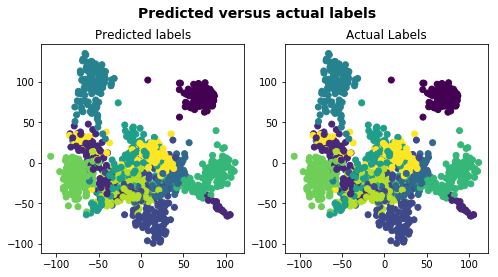

In [40]:
# 對 `digits` 資料降維
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 SVC 演算法
predicted = svc_model.predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整外觀
fig.subplots_adjust(top=0.85)

# 繪製散佈圖 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=predicted)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Labels')

# 加入標題
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# 顯示圖形
plt.show()